# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [1]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [4]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [5]:
query_main=query="""
    select * 
    from agg.tidy_data_30min
    where site = 20
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


In [6]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-10-29 09:00:00+00:00,20,2019,10,29,10,0,1,4,139.10,NaN,NaN,NaN,NaN,NaN,NaN,503.70,80.5875,435.12,244.32,0
1,2019-10-29 09:30:00+00:00,20,2019,10,29,10,30,1,4,139.09,NaN,NaN,NaN,NaN,NaN,NaN,429.62,66.0650,455.94,175.82,0
2,2019-10-29 10:00:00+00:00,20,2019,10,29,11,0,1,4,163.53,NaN,NaN,NaN,NaN,NaN,NaN,381.82,38.1425,390.15,167.18,0
3,2019-10-29 10:30:00+00:00,20,2019,10,29,11,30,1,4,130.66,NaN,NaN,NaN,NaN,NaN,NaN,293.05,27.2150,407.91,114.68,0
4,2019-10-29 11:00:00+00:00,20,2019,10,29,12,0,1,4,122.51,NaN,NaN,NaN,NaN,NaN,NaN,285.83,15.2600,459.76,108.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,2020-03-30 04:30:00+00:00,20,2020,3,30,5,30,0,2,511.06,NaN,NaN,NaN,NaN,NaN,NaN,608.02,16.3600,570.76,147.54,0
17558,2020-03-30 05:00:00+00:00,20,2020,3,30,6,0,0,2,320.69,NaN,NaN,NaN,NaN,NaN,NaN,586.85,42.6575,635.50,216.76,0
17559,2020-03-30 05:30:00+00:00,20,2020,3,30,6,30,0,2,245.21,NaN,NaN,NaN,NaN,NaN,NaN,524.16,50.5500,616.78,256.78,0
17560,2020-03-30 06:00:00+00:00,20,2020,3,30,7,0,0,2,187.68,NaN,NaN,NaN,NaN,NaN,NaN,458.60,28.3925,428.11,144.64,0


In [7]:
df_main = df_main[['timestamp','net_load','month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday','solar_radiation','sunshine_duration']]
df_main

,timestamp,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
0,2019-10-29 09:00:00+00:00,139.10,10,29,10,1,4,503.70,0,NaN,NaN
1,2019-10-29 09:30:00+00:00,139.09,10,29,10,1,4,429.62,0,NaN,NaN
2,2019-10-29 10:00:00+00:00,163.53,10,29,11,1,4,381.82,0,NaN,NaN
3,2019-10-29 10:30:00+00:00,130.66,10,29,11,1,4,293.05,0,NaN,NaN
4,2019-10-29 11:00:00+00:00,122.51,10,29,12,1,4,285.83,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17557,2020-03-30 04:30:00+00:00,511.06,3,30,5,0,2,608.02,0,NaN,NaN
17558,2020-03-30 05:00:00+00:00,320.69,3,30,6,0,2,586.85,0,NaN,NaN
17559,2020-03-30 05:30:00+00:00,245.21,3,30,6,0,2,524.16,0,NaN,NaN
17560,2020-03-30 06:00:00+00:00,187.68,3,30,7,0,2,458.60,0,NaN,NaN


### Convert Convert 'ts' to datetime and set as index

### Normalise net_load

In [8]:
df_main.rename(columns={'timestamp':'ts'},inplace=True)
df_main['ts'] = pd.to_datetime(df_main['ts'])
df_main.set_index('ts', inplace=True)
df_main.sort_index(inplace=True)
df_main.head()

#df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
#df_main.set_index('datetime', inplace=True)

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,152.86,0,0.0,0.0
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,204.52,0,0.0,0.0
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,214.66,0,0.0,0.0
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,209.72,0,0.0,0.0
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,230.59,0,0.0,0.0


<Axes: xlabel='ts'>

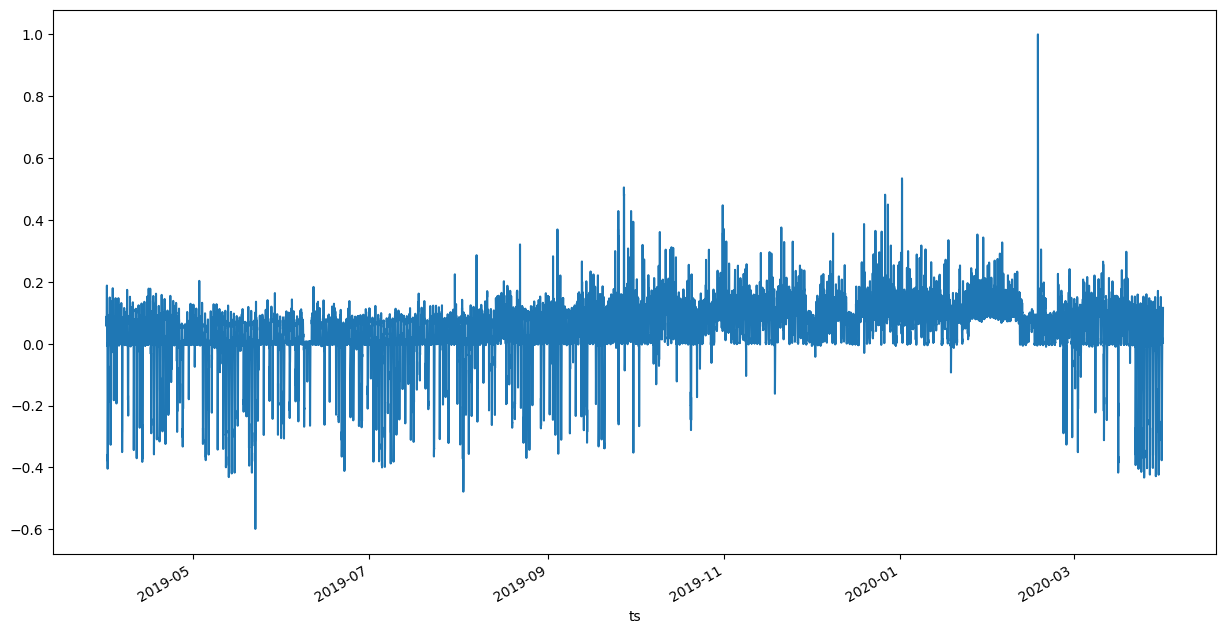

In [9]:
df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
df_main.drop('net_load',axis=1,inplace=True)

plt.figure(figsize=(15,8))
df_main['net_load_norm'].plot()

In [10]:
df_main.head()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm
ts,,,,,,,,,,
2019-04-01 00:00:00+00:00,4,1,1,0,2,152.86,0,0.0,0.0,0.066453
2019-04-01 00:30:00+00:00,4,1,1,0,2,204.52,0,0.0,0.0,0.083742
2019-04-01 01:00:00+00:00,4,1,2,0,2,214.66,0,0.0,0.0,0.064875
2019-04-01 01:30:00+00:00,4,1,2,0,2,209.72,0,0.0,0.0,0.082010
2019-04-01 02:00:00+00:00,4,1,3,0,2,230.59,0,0.0,0.0,0.074773


### Creating function for lagged net_load

In [11]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    #df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,48,96]


# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,4,1,1,0,2,152.86,0,0.0,0.0,0.066453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:30:00+00:00,4,1,1,0,2,204.52,0,0.0,0.0,0.083742,0.066453,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:00:00+00:00,4,1,2,0,2,214.66,0,0.0,0.0,0.064875,0.083742,0.066453,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:30:00+00:00,4,1,2,0,2,209.72,0,0.0,0.0,0.082010,0.064875,0.083742,0.066453,NaN,NaN,NaN,NaN
2019-04-01 02:00:00+00:00,4,1,3,0,2,230.59,0,0.0,0.0,0.074773,0.082010,0.064875,0.083742,0.066453,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,3,31,21,1,2,282.00,0,NaN,NaN,0.009393,0.003149,0.005629,0.005181,0.003640,0.005125,0.097287,0.004503
2020-03-31 21:00:00+00:00,3,31,22,1,2,321.01,0,NaN,NaN,0.003711,0.009393,0.003149,0.005629,0.005181,0.003640,0.104725,0.004122
2020-03-31 21:30:00+00:00,3,31,22,1,2,353.42,0,NaN,NaN,0.065681,0.003711,0.009393,0.003149,0.005629,0.005181,0.106574,0.091033


In [12]:
[ - 1 - lag for lag in lags]

[-2, -3, -4, -5, -6, -49, -97]

#### Create initial_ts by taking the last 96 observations (48 hours) from this point backward to cover all lags

(Previously took the last 192 observations of 15 minute-intervalls (48 hours) from this point backward to cover all lags)

In [13]:
# Identify the time point for initial_ts
#Identify the start and end points for creating an initial time series to use in rolling predictions. 
#Select a subset of df_lagge to be the set of data that the rolling prediction function will use to start making predictions


end_time = df_lagged.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours / Should i not be using 36 hours?

# Make sure you don't go out of bounds
if start_time < df_lagged.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create initial_ts for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_lagged.loc[start_time:end_time]['net_load_norm']

In [14]:
initial_ts

ts
2020-03-30 22:30:00+00:00    0.090709
2020-03-30 23:00:00+00:00    0.079560
2020-03-30 23:30:00+00:00    0.077544
2020-03-31 00:00:00+00:00    0.106838
2020-03-31 00:30:00+00:00    0.081542
2020-03-31 01:00:00+00:00    0.083513
2020-03-31 01:30:00+00:00    0.074653
2020-03-31 02:00:00+00:00    0.092881
2020-03-31 02:30:00+00:00    0.097759
2020-03-31 03:00:00+00:00    0.079811
2020-03-31 03:30:00+00:00    0.082298
2020-03-31 04:00:00+00:00    0.086874
2020-03-31 04:30:00+00:00    0.151174
2020-03-31 05:00:00+00:00    0.118073
2020-03-31 05:30:00+00:00    0.117120
2020-03-31 06:00:00+00:00    0.051948
2020-03-31 06:30:00+00:00    0.018142
2020-03-31 07:00:00+00:00   -0.002196
2020-03-31 07:30:00+00:00    0.001839
2020-03-31 08:00:00+00:00    0.005265
2020-03-31 08:30:00+00:00   -0.001157
2020-03-31 09:00:00+00:00   -0.027896
2020-03-31 09:30:00+00:00   -0.020916
2020-03-31 10:00:00+00:00   -0.035127
2020-03-31 10:30:00+00:00   -0.152839
2020-03-31 11:00:00+00:00   -0.351890
2020-03-3

### Define features and target, train and test

In [15]:
features = ['net_load_lag_1', 'net_load_lag_2', 'net_load_lag_3', 'net_load_lag_4', 'net_load_lag_5', 
            'net_load_lag_48', 'net_load_lag_96', 'month', 'day', 'hour', 'day_of_week', 'season', 
            'avg_net_load', 'weekend_or_bank_holiday', 'solar_radiation', 'sunshine_duration']


In [16]:
# Define features and target
#X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
X = df_lagged[features]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-72]
test_features = X.iloc[-72:]

train_target = y.iloc[:-72]
test_target = y.iloc[-72:]

In [17]:
print(train_features.shape)
print(test_target.shape)

(17490, 16)
(72,)


### Model definition and training 

In [18]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

### Create get_input function 

In [19]:
# Define the additional features (excluding the lagged net load)
# additional_features = ['month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load', 'weekend_or_bank_holiday', 'solar_radiation', 'sunshine_duration']

In [20]:
train_target

ts
2019-04-01 00:00:00+00:00    0.066453
2019-04-01 00:30:00+00:00    0.083742
2019-04-01 01:00:00+00:00    0.064875
2019-04-01 01:30:00+00:00    0.082010
2019-04-01 02:00:00+00:00    0.074773
                               ...   
2020-03-30 08:30:00+00:00   -0.013492
2020-03-30 09:00:00+00:00   -0.007862
2020-03-30 09:30:00+00:00   -0.056658
2020-03-30 10:00:00+00:00   -0.405268
2020-03-30 10:30:00+00:00   -0.423423
Name: net_load_norm, Length: 17490, dtype: float64

In [21]:
train_target.iloc[[ - 1 - lag for lag in lags]].values.reshape(1, -1)

array([[-0.40526835, -0.05665814, -0.00786241, -0.01349178, -0.00755486,
        -0.13813034,  0.00601046]])

In [22]:
lags

[1, 2, 3, 4, 5, 48, 96]

In [23]:
def get_timestamp_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [ - lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

In [24]:
print(train_target.tail())
print(train_target.iloc[-2])
print(get_timestamp_input(train_target, lags))

ts
2020-03-30 08:30:00+00:00   -0.013492
2020-03-30 09:00:00+00:00   -0.007862
2020-03-30 09:30:00+00:00   -0.056658
2020-03-30 10:00:00+00:00   -0.405268
2020-03-30 10:30:00+00:00   -0.423423
Name: net_load_norm, dtype: float64
-0.405268348125491
[[-0.42342342 -0.40526835 -0.05665814 -0.00786241 -0.01349178 -0.42820706
  -0.00664561]]


In [25]:
df_lagged.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,,,,,,,,,,
2020-03-31 20:30:00+00:00,3,31,21,1,2,282.00,0,NaN,NaN,0.009393,0.003149,0.005629,0.005181,0.003640,0.005125,0.097287,0.004503
2020-03-31 21:00:00+00:00,3,31,22,1,2,321.01,0,NaN,NaN,0.003711,0.009393,0.003149,0.005629,0.005181,0.003640,0.104725,0.004122
2020-03-31 21:30:00+00:00,3,31,22,1,2,353.42,0,NaN,NaN,0.065681,0.003711,0.009393,0.003149,0.005629,0.005181,0.106574,0.091033
2020-03-31 22:00:00+00:00,3,31,23,1,2,219.42,0,NaN,NaN,0.097993,0.065681,0.003711,0.009393,0.003149,0.005629,0.100984,0.104421
2020-03-31 22:30:00+00:00,3,31,23,1,2,193.11,0,NaN,NaN,0.115897,0.097993,0.065681,0.003711,0.009393,0.003149,0.090709,0.096622


In [26]:
df_test = df_lagged.drop(df_lagged.columns[df_lagged.columns.str.startswith('net_load_lag')], axis = 1)

In [27]:
df_test.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm
ts,,,,,,,,,,
2020-03-31 20:30:00+00:00,3,31,21,1,2,282.00,0,NaN,NaN,0.009393
2020-03-31 21:00:00+00:00,3,31,22,1,2,321.01,0,NaN,NaN,0.003711
2020-03-31 21:30:00+00:00,3,31,22,1,2,353.42,0,NaN,NaN,0.065681
2020-03-31 22:00:00+00:00,3,31,23,1,2,219.42,0,NaN,NaN,0.097993
2020-03-31 22:30:00+00:00,3,31,23,1,2,193.11,0,NaN,NaN,0.115897


In [28]:
train_target

ts
2019-04-01 00:00:00+00:00    0.066453
2019-04-01 00:30:00+00:00    0.083742
2019-04-01 01:00:00+00:00    0.064875
2019-04-01 01:30:00+00:00    0.082010
2019-04-01 02:00:00+00:00    0.074773
                               ...   
2020-03-30 08:30:00+00:00   -0.013492
2020-03-30 09:00:00+00:00   -0.007862
2020-03-30 09:30:00+00:00   -0.056658
2020-03-30 10:00:00+00:00   -0.405268
2020-03-30 10:30:00+00:00   -0.423423
Name: net_load_norm, Length: 17490, dtype: float64

In [29]:
get_timestamp_input(train_target, lags)[0]# + [df_lagged.columns[df_lagged.columns.str.startswith('net_load_lag')]]

array([-0.42342342, -0.40526835, -0.05665814, -0.00786241, -0.01349178,
       -0.42820706, -0.00664561])

In [30]:
#input_features = get_input(train_target, lags)
#pred = rf.predict(input_features)
#print(input_features)
#print(pred)

In [31]:
initial_ts

ts
2020-03-30 22:30:00+00:00    0.090709
2020-03-30 23:00:00+00:00    0.079560
2020-03-30 23:30:00+00:00    0.077544
2020-03-31 00:00:00+00:00    0.106838
2020-03-31 00:30:00+00:00    0.081542
2020-03-31 01:00:00+00:00    0.083513
2020-03-31 01:30:00+00:00    0.074653
2020-03-31 02:00:00+00:00    0.092881
2020-03-31 02:30:00+00:00    0.097759
2020-03-31 03:00:00+00:00    0.079811
2020-03-31 03:30:00+00:00    0.082298
2020-03-31 04:00:00+00:00    0.086874
2020-03-31 04:30:00+00:00    0.151174
2020-03-31 05:00:00+00:00    0.118073
2020-03-31 05:30:00+00:00    0.117120
2020-03-31 06:00:00+00:00    0.051948
2020-03-31 06:30:00+00:00    0.018142
2020-03-31 07:00:00+00:00   -0.002196
2020-03-31 07:30:00+00:00    0.001839
2020-03-31 08:00:00+00:00    0.005265
2020-03-31 08:30:00+00:00   -0.001157
2020-03-31 09:00:00+00:00   -0.027896
2020-03-31 09:30:00+00:00   -0.020916
2020-03-31 10:00:00+00:00   -0.035127
2020-03-31 10:30:00+00:00   -0.152839
2020-03-31 11:00:00+00:00   -0.351890
2020-03-3

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

### get_input_new --> Version 2 to include weather features
1. Define new df = df_other_features from the train_features set (which includes lagged net_load values as well) and remove lagged values
2. Add back later on lagged values cthrough the get_input function to account for their updates 

In [32]:
df_other_features = test_features.drop(test_features.columns[test_features.columns.str.startswith('net_load_lag')], axis = 1)

In [33]:
def get_lags_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [- lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

In [34]:
#def get_feature_input(target_ts, other_features, lags):
    # Convert lags to positions from the end of the series
    #positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    #return np.concatenate((target_ts.iloc[positions], other_features.iloc[-1]), axis = 0).reshape(1, -1)

In [35]:
def get_other_features_input(other_features, index):
    return other_features.loc[index].values.reshape(1, -1)

In [36]:
def get_prediction_input(ts, other_features, lags):
    input_lags = get_lags_input(ts, lags)
    index = ts.index[-1] + pd.Timedelta(minutes=30)
    
    input_features = get_other_features_input(other_features, index)
    
    return np.concatenate((input_lags, input_features), axis = 1)

In [37]:
def rolling_window_predictions(model, full_series, other_features, n, lags):
    
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for i in range(0, n): # Iterate over the test set to predict one step ahead each time
        
        input_features = get_prediction_input(initial_ts, other_features, lags) # Get the input features for the current prediction

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        new_index = initial_ts.index[-1] + pd.Timedelta(minutes=30)

        print("new_index: ", new_index)
        initial_ts.loc[new_index] = pred
    
    return predictions

# predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

In [38]:
#This is one iteration! 

#initial_ts=train_target.copy()

#input_features = get_prediction_input(initial_ts, df_other_features, lags) # Get the input features for the current prediction

#pred = rf.predict(input_features)[0] # Predict the next time step and store the prediction

#new_index = initial_ts.index[-1] + pd.Timedelta(minutes=30)

#initial_ts.loc[new_index] = pred

#initial_ts

In [51]:
df_other_features


#check df_other_features between Timestamp('2020-03-28 23:00:00+0000', tz='UTC') and Timestamp('2020-03-29 01:00:00+0000', tz='UTC')
df_other_features.loc['2020-03-28 23:00:00+00:00':'2020-03-29 02:00:00+00:00']

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,


In [40]:
prediction_test=rolling_window_predictions(rf, train_target, df_other_features, 72, lags)
len(prediction_test)

new_index:  2020-03-30 11:00:00+00:00
new_index:  2020-03-30 11:30:00+00:00
new_index:  2020-03-30 12:00:00+00:00
new_index:  2020-03-30 12:30:00+00:00
new_index:  2020-03-30 13:00:00+00:00
new_index:  2020-03-30 13:30:00+00:00
new_index:  2020-03-30 14:00:00+00:00
new_index:  2020-03-30 14:30:00+00:00
new_index:  2020-03-30 15:00:00+00:00
new_index:  2020-03-30 15:30:00+00:00
new_index:  2020-03-30 16:00:00+00:00
new_index:  2020-03-30 16:30:00+00:00
new_index:  2020-03-30 17:00:00+00:00
new_index:  2020-03-30 17:30:00+00:00
new_index:  2020-03-30 18:00:00+00:00
new_index:  2020-03-30 18:30:00+00:00
new_index:  2020-03-30 19:00:00+00:00
new_index:  2020-03-30 19:30:00+00:00
new_index:  2020-03-30 20:00:00+00:00
new_index:  2020-03-30 20:30:00+00:00
new_index:  2020-03-30 21:00:00+00:00
new_index:  2020-03-30 21:30:00+00:00
new_index:  2020-03-30 22:00:00+00:00
new_index:  2020-03-30 22:30:00+00:00
new_index:  2020-03-30 23:00:00+00:00
new_index:  2020-03-30 23:30:00+00:00
new_index:  

72

In [41]:
###################### Old model
# def rolling_window_predictions(model, full_series, n, lags):
    
#     initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
#     predictions = []  # Store out-of-sample predictions
    
#     for i in range(0, n): # Iterate over the test set to predict one step ahead each time
#         input_features = get_input(initial_ts, lags).reshape(1, -1) # Get the input features for the current prediction
        
#         # model.fit(input_features, input_target)

#         pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
#         predictions.append(pred)
        
#         # Append the actual observed value to roll the window forward
#         initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
    
#     return predictions

# # predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

In [42]:
predicted_values = rolling_window_predictions(rf, train_target, other_features = df_other_features, n = 36, lags=[1,2,3,4,5,48,96])

# predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

new_index:  2020-03-30 11:00:00+00:00
new_index:  2020-03-30 11:30:00+00:00
new_index:  2020-03-30 12:00:00+00:00
new_index:  2020-03-30 12:30:00+00:00
new_index:  2020-03-30 13:00:00+00:00
new_index:  2020-03-30 13:30:00+00:00
new_index:  2020-03-30 14:00:00+00:00
new_index:  2020-03-30 14:30:00+00:00
new_index:  2020-03-30 15:00:00+00:00
new_index:  2020-03-30 15:30:00+00:00
new_index:  2020-03-30 16:00:00+00:00
new_index:  2020-03-30 16:30:00+00:00
new_index:  2020-03-30 17:00:00+00:00
new_index:  2020-03-30 17:30:00+00:00
new_index:  2020-03-30 18:00:00+00:00
new_index:  2020-03-30 18:30:00+00:00
new_index:  2020-03-30 19:00:00+00:00
new_index:  2020-03-30 19:30:00+00:00
new_index:  2020-03-30 20:00:00+00:00
new_index:  2020-03-30 20:30:00+00:00
new_index:  2020-03-30 21:00:00+00:00
new_index:  2020-03-30 21:30:00+00:00
new_index:  2020-03-30 22:00:00+00:00
new_index:  2020-03-30 22:30:00+00:00
new_index:  2020-03-30 23:00:00+00:00
new_index:  2020-03-30 23:30:00+00:00
new_index:  

In [43]:
print(len(predicted_values))
predicted_values

36


[-0.36183556469270767,
 -0.3182649216934931,
 -0.2613696033696033,
 -0.23723451837737536,
 -0.15326583616640765,
 -0.13765654969997823,
 -0.09479249193534914,
 -0.09424606796035363,
 -0.08061391632820201,
 -0.0821325444182587,
 -0.08024442995871565,
 -0.08332317103745672,
 -0.0867061124203981,
 -0.08819181333467047,
 -0.0839224456367313,
 -0.08679088736231595,
 -0.0897354460211603,
 -0.08067472296043719,
 -0.08929512443798159,
 -0.08247204532918813,
 -0.08724835781978638,
 -0.08140356683213824,
 -0.0859667385381671,
 -0.08585465242608097,
 -0.1546564040849755,
 -0.043129418843704546,
 -0.11284407227264362,
 -0.11447050761336479,
 -0.10659730231158802,
 -0.10446218389075529,
 -0.10496849353992208,
 -0.057799562085276326,
 -0.1277446388874959,
 -0.05307844022129733,
 -0.129558541844256,
 0.01449029734744022]

## Implement the rolling window predictions with the new function

## Re-define train + test to include 30 days for test

In [44]:
# Define features and target
# X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
X = df_lagged[features]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-2160]
train_target = y.iloc[:-2160]

test_target = y.iloc[-2160:]
test_features = X.iloc[-2160:]


In [45]:
test_target

ts
2020-02-15 21:00:00+00:00    0.082639
2020-02-15 21:30:00+00:00    0.090428
2020-02-15 22:00:00+00:00    0.081763
2020-02-15 22:30:00+00:00    0.094222
2020-02-15 23:00:00+00:00    0.087162
                               ...   
2020-03-31 20:30:00+00:00    0.009393
2020-03-31 21:00:00+00:00    0.003711
2020-03-31 21:30:00+00:00    0.065681
2020-03-31 22:00:00+00:00    0.097993
2020-03-31 22:30:00+00:00    0.115897
Name: net_load_norm, Length: 2160, dtype: float64

In [46]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

In [47]:
def nested_prediction_model(model, input_ts, other_features, true_data, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    full_predictions = []
    ts = input_ts.copy()
# Iterate over each day in the test data
    for day in range(0, n_days):
        
        # Make predictions for the current day
        pred_day = rolling_window_predictions(model, ts, other_features, n_steps, lags)

        # Append the day's predictions to the full predictions
        full_predictions.extend(pred_day)

        # update true values
        true_values = true_data[day*n_steps : (day+1)*n_steps]

        ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the predicted values

    return full_predictions



In [48]:
full_predictions=nested_prediction_model(rf, train_target, df_other_features, test_target, 72, 30, lags=[1,2,3,4,5,48,96])
full_predictions

KeyError: Timestamp('2020-02-15 21:00:00+0000', tz='UTC')

In [ ]:
len(full_predictions)

2160

Convert full_predictions into a Pandas Series with the same index as the test_target

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])



In [ ]:
print(len(test_target))
print(len(train_target))

2160
14812


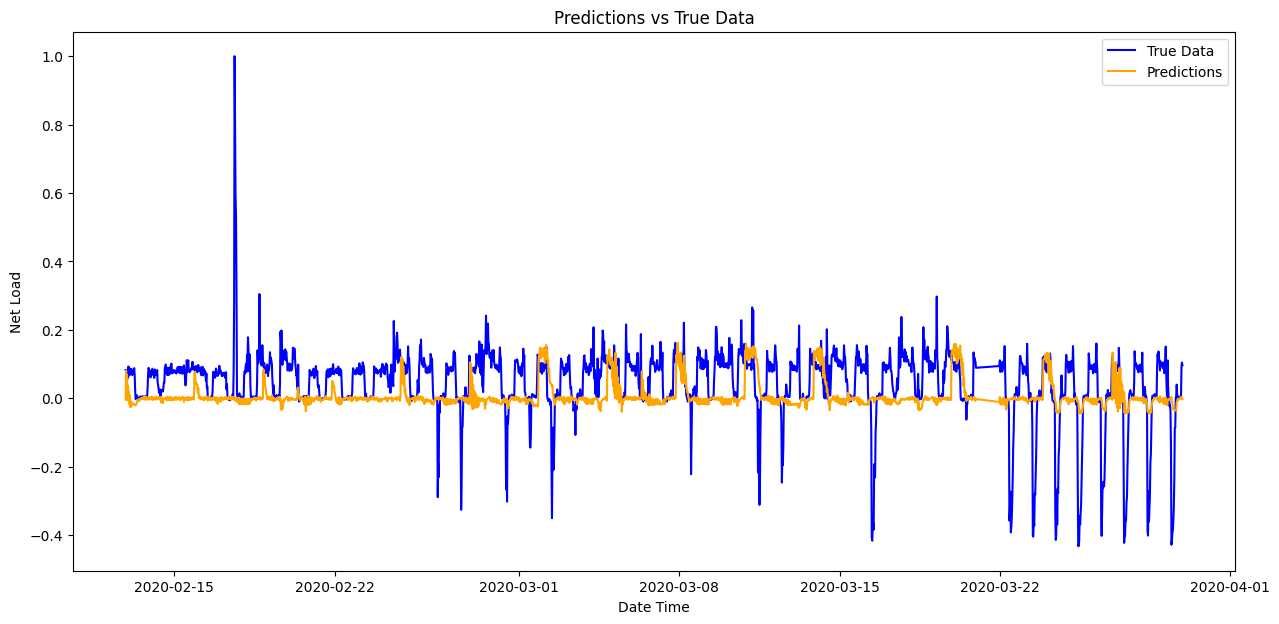

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()

In [ ]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-02-12 18:30:00+00:00    0.003363
2020-02-12 19:00:00+00:00    0.004657
2020-02-12 19:30:00+00:00    0.006057
2020-02-12 20:00:00+00:00    0.006438
2020-02-12 20:30:00+00:00    0.068863
Name: net_load_norm, Length: 14812, dtype: float64

## .
## . 
## Iteration where model is updated the prediction point every 30 minutes 
### (as opposed to the 24 hours daily loop)

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, update_interval, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the number of updates based on the update interval
    n_updates = len(true_data) // update_interval

    for update in range(n_updates):
        # Generate predictions for the next 36 hours
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        
        # Store the first prediction (next 30 minutes) and discard the rest
        full_predictions.append(pred_day[0])

        # Determine the index for updating ts with true values or predictions
        update_idx = min((update + 1) * update_interval, len(true_data))

        # Update ts with the true value if available, otherwise use the predicted value
        next_values = true_data[update * update_interval : update_idx]
        ts = pd.concat([ts, next_values]) if not next_values.empty else pd.concat([ts, pd.Series(pred_day[:update_interval])])

        # Ensure ts is the correct length for the next prediction
        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, update_interval, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the total number of updates
    n_updates = (len(true_data) - n_steps) // update_interval + 1

    for update in range(n_updates):
        if (update + 1) * update_interval + n_steps > len(true_data):
            break  # Break if the next slice would be out of bounds

        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        full_predictions.append(pred_day[0])

        update_idx = (update + 1) * update_interval
        next_values = true_data[update * update_interval : min(update_idx, len(true_data))]

        if not next_values.empty:
            ts = pd.concat([ts, next_values])
        else:
            ts = pd.concat([ts, pd.Series(pred_day[0])])

        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
full_predictions = nested_prediction_model_30min(rf, train_target, test_target, 72, 1, lags=[1,2,3,4,5,48,96])


TypeError: rolling_window_predictions() missing 1 required positional argument: 'lags'

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the number of 30-min intervals in the test period
    n_intervals = len(true_data) - n_steps + 1

    for interval in range(n_intervals):
        # Generate predictions for the next 36 hours
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        
        # Store the first prediction (next 30 minutes) and discard the rest
        full_predictions.append(pred_day[0])

        # Update ts with the true value if available, otherwise use the predicted value
        if interval < n_intervals - 1:
            true_value = true_data[interval : interval + 1].values
            ts = pd.concat([ts, pd.Series(true_value)])
        else:
            ts = pd.concat([ts, pd.Series(pred_day[0])])

        # Ensure ts is the correct length for the next prediction
        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
#def nested_prediction_model_30min(model, input_ts, true_data, n_steps, lags):

full_predictions=nested_prediction_model_30min(rf, train_target, test_target, 72, lags=[1,2,3,4,5,48,96])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

IndexError: positional indexers are out-of-bounds

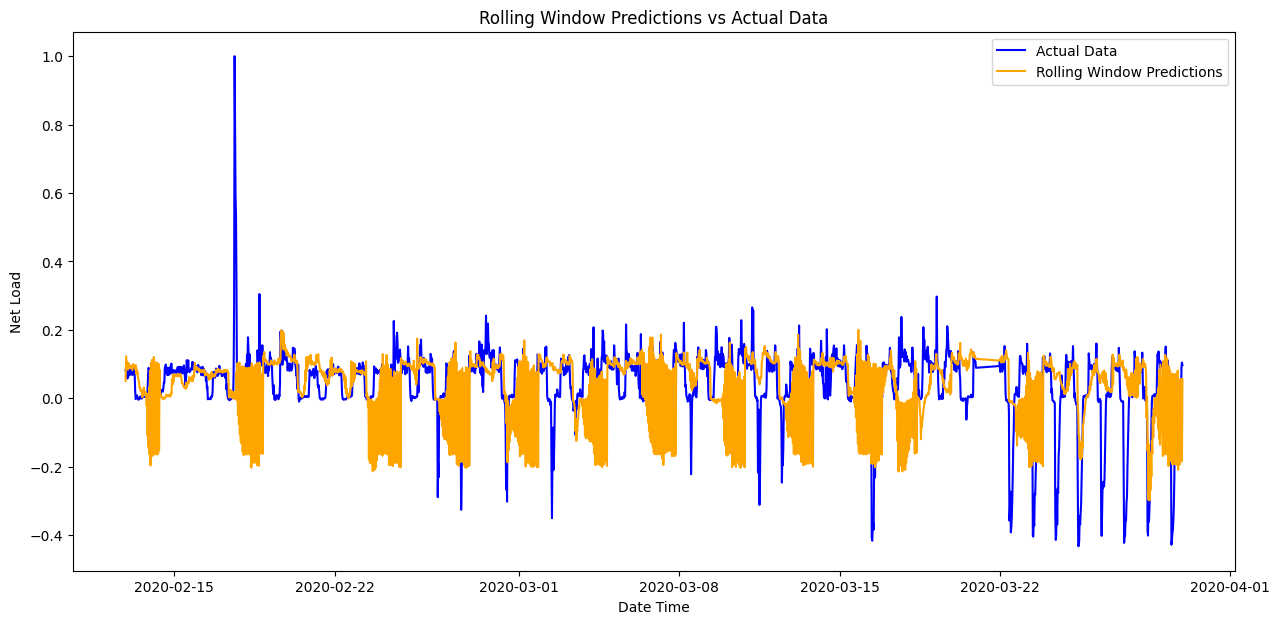

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])
# Plot the full predictions against the actual data
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='Actual Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Rolling Window Predictions', color='orange')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.title('Rolling Window Predictions vs Actual Data')
plt.show()
